# article_new 

In [2]:
import numpy as np
import random
from random import sample
import math 
import operator

In [3]:
z = 10 #Degradation threshold

def state(amount):
    new_state = []    
    if (amount >= 0 and amount <3):
        new_state = 0 # healthy1
    
    if (amount >= 3 and amount <7):
        new_state = 1 # healthy2
        
    if (amount >= 7 and amount < z ):
        new_state = 2 #healthy3 
        
    if (amount >= z):
        new_state = 3 # fail
    
    return new_state

In [4]:
def Rewardfun(degradation):
    Reward=np.zeros((4,)+(3,))
    Reward[: , 0] = -50
    Reward[3,0] = -1050
    Reward[: , 1] = -500*(degradation/z)-50
    Reward[3,1] = -1150
    Reward[: , 2] = -550
    Reward[3,2] = -1550
       
    return Reward

In [5]:
a = 8

def Envirenment(degradation , action):
   
    n2 = np.random.poisson((1-0.001)*4, 1) # number of effective shock
    w2 = np.random.gamma(0.6, 1.2, n2) # magnitude of effective shock
    magnitude = sum(w2)
    next_state = 0
    reward = 0
    
    if action == 0 :#do nothing
        
            degradation += (magnitude + 3)/a
            next_state=state(degradation)
            Reward=Rewardfun(degradation)
            reward=Reward[next_state,action]
        
    if action == 1 : #repair
        
           # decay = degradation*np.random.beta(0.5, 1, 1)
            #decay = degradation/z
            #degradation -= decay*degradation
            degradation = np.max((0.05, degradation))
            decay =(np.random.gamma(degradation*degradation/2,2/(degradation),1)/z)[0]
            degradation -= np.max((0, decay*degradation))
            degradation = np.max((0.05, degradation))
            degradation += (magnitude + 2.95)/a
            next_state=state(degradation)
            Reward=Rewardfun(degradation)
            reward=Reward[next_state,action]
                    
    if action == 2 : # replace
        
            degradation = (magnitude + 2.85)/a
            next_state=state(degradation)
            Reward=Rewardfun(degradation)
            reward=Reward[next_state,action]
       
    
    return next_state , reward , degradation


In [6]:
degradation=5.214445
(np.random.gamma(degradation*degradation/2,2/(degradation+0.001),20)/z)

array([0.51205132, 0.50456512, 0.42800651, 0.65310579, 0.35489943,
       0.44230177, 0.72381036, 0.29079703, 0.4356845 , 0.57258315,
       0.55339843, 0.51277595, 0.47475913, 0.43230524, 0.46317392,
       0.58980041, 0.48051082, 0.46504826, 0.51969582, 0.52879453])

In [7]:
def choose_action(epsilon,current_state):
    if current_state == 3 :
        return 2 #replace
    else:
        if (np.random.random() < epsilon):
            return random.choice([0,1,2]) 
        else:
            return np.argmax(Q_table[current_state])

In [8]:
num_episodes=2000
discount=0.88

In [9]:
optimal_value =[]
current_state = 0 #it is new
degradation = 0
epsilon = 1
learning_rate = 1

for j in range(2000+1):
     #Choose A from S
    action = choose_action(epsilon,current_state)   
    # Take action
    current_state, reward ,degradation = Envirenment(degradation,action)
    print (reward ,degradation , action )



-50.0 0.6515703649277651 0
-111.77132182604588 1.2354264365209175 1
-142.67431120526066 1.8534862241052132 1
-550.0 0.4904414139387072 2
-50.0 1.0556303492366768 0
-550.0 1.1338978918920797 2
-134.71799568726783 1.6943599137453562 1
-50.0 2.3780607506364726 0
-50.0 3.1124601618078804 0
-550.0 0.6796876810252414 2
-550.0 0.5116148992358152 2
-107.67596924862181 1.1535193849724363 1
-130.48778531481236 1.6097557062962466 1
-201.48181051170937 3.0296362102341874 1
-550.0 0.8969768017284092 2
-550.0 0.7283087183773467 2
-50.0 1.1192638588166877 0
-109.9300343200708 1.1986006864014163 1
-550.0 0.35625 2
-50.0 0.9660874823018433 0
-116.59217878531454 1.331843575706291 1
-50.0 3.6292565385291295 0
-50.0 4.854348513227844 0
-550.0 0.5166443115893615 2
-50.0 0.9254941746842822 0
-550.0 0.9453596623121858 2
-50.0 1.6920034763566547 0
-172.56052354129866 2.4512104708259734 1
-50.0 2.8810993566442797 0
-50.0 3.2560993566442797 0
-550.0 0.44904476833199064 2
-50.0 1.5001044101689016 0
-125.07523833

-132.01541031876275 1.6403082063752548 1
-550.0 0.7244680372543915 2
-105.75220935247634 1.115044187049527 1
-550.0 0.6544153544593543 2
-50.0 1.1807770874773793 0
-133.32642249068329 1.6665284498136659 1
-50.0 2.067933232104318 0
-550.0 0.8601486052151253 2
-50.0 2.0848718834094333 0
-550.0 0.6077386415762458 2
-550.0 0.7692854148434556 2
-550.0 0.708285465498771 2
-124.62223986760094 1.492444797352019 1
-550.0 0.7256374828177842 2
-550.0 0.954712901474893 2
-150.1665113172548 2.0033302263450956 1
-550.0 0.6573942960048696 2
-126.42316666808838 1.5284633333617679 1
-550.0 0.5647058244520915 2
-108.5973860281816 1.171947720563632 1
-50.0 1.7178202494014285 0
-50.0 2.3938923539172503 0
-550.0 1.0021679290550816 2
-125.06945700248191 1.5013891400496382 1
-50.0 1.8983691876399182 0
-50.0 2.2741734801964233 0
-550.0 0.8931370381975712 2
-141.40938890679678 1.828187778135936 1
-50.0 2.4238695314188683 0
-160.18594840789183 2.203718968157837 1
-550.0 0.4851086186376362 2
-50.0 0.894873830513

-550.0 0.39247303764950237 2
-103.76131054924569 1.0752262109849138 1
-550.0 0.4590202544830537 2
-108.03893347621323 1.1607786695242646 1
-50.0 1.6341390175612938 0
-50.0 2.361460103603637 0
-550.0 0.6134318101932629 2
-550.0 0.45099652548879154 2
-550.0 0.6601039318771724 2
-108.73478244210963 1.1746956488421927 1
-50.0 1.556417191523265 0
-138.5098360956498 1.770196721912996 1
-550.0 1.5674764897675022 2
-155.75776688670072 2.115155337734014 1
-50.0 2.5794057531846604 0
-179.30686873581084 2.586137374716217 1
-192.78305856964738 2.8556611713929474 1
-50.0 4.092323022699782 0
-50.0 4.522999022691327 0
-198.32125302361902 2.96642506047238 1
-184.6735390336151 2.693470780672302 1
-550.0 1.0864366675512507 2
-550.0 0.8888700937807283 2
-50.0 1.4841982773184754 0
-143.13094660592026 1.862618932118405 1
-50.0 2.61987126321322 0
-550.0 0.3935064514592636 2
-113.543303325914 1.2708660665182798 1
-50.0 2.0984076651064947 0
-180.3379251690108 2.606758503380216 1
-50.0 3.2378515009061113 0
-17

-50.0 1.6753694494905702 0
-172.46727546744225 2.449345509348845 1
-164.99990288460612 2.299998057692122 1
-50.0 3.067968492092098 0
-50.0 4.175680773533793 0
-50.0 4.9193278601814034 0
-550.0 0.8175849761772557 2
-155.63728854489267 2.112745770897853 1
-50.0 2.578286377896635 0
-50.0 3.1988596984458306 0
-198.33004089268454 2.9666008178536907 1
-201.7723690526198 3.0354473810523963 1
-550.0 0.48707959690150465 2
-95.87807601586837 0.9175615203173673 1
-50.0 1.3834135928073912 0
-550.0 0.3569155492631589 2
-50.0 0.9184963635012247 0
-50.0 1.434760662088163 0
-121.50410513472167 1.4300821026944333 1
-550.0 0.7132127762731271 2
-50.0 1.131718717976196 0
-50.0 1.5835544536841397 0
-142.08155866582757 1.8416311733165514 1
-168.15445173648072 2.3630890347296143 1
-50.0 3.555938573307185 0
-550.0 0.5227751714010789 2
-50.0 1.368636932032853 0
-151.8350488860566 2.0367009777211322 1
-50.0 2.4659569074545638 0
-550.0 0.5176520103517819 2
-550.0 0.43658666512266886 2
-133.8953707731946 1.677907

-104.79689247587764 1.095937849517553 1
-550.0 1.0838820857472282 2
-50.0 1.6192150103592837 0
-140.4280170439405 1.8085603408788105 1
-550.0 0.3652509059620084 2
-98.35255556898309 0.9670511113796619 1
-126.09060015709817 1.5218120031419633 1
-50.0 2.8565703263756053 0
-188.9649579294909 2.779299158589818 1
-164.21494666216918 2.2842989332433836 1
-185.3970120591711 2.707940241183422 1
-550.0 0.5948667726432366 2
-550.0 1.511126776694303 2
-141.12521325572015 1.8225042651144032 1
-550.0 0.6145546025712849 2
-50.0 1.308256602367929 0
-136.58708519940166 1.7317417039880332 1
-96.53370633518296 0.9306741267036591 1
-50.0 1.8196621149384715 0
-50.0 2.7190675288544295 0
-550.0 0.35625 2
-50.0 2.060988209689073 0
-550.0 1.4781870119202198 2
-50.0 1.927796623547594 0
-50.0 2.4619344148794635 0
-550.0 0.7379066479687555 2
-550.0 0.9230321581451635 2
-130.56493382435832 1.6112986764871668 1
-50.0 2.1392695744740444 0
-166.3166809242478 2.3263336184849566 1
-550.0 0.5214972568242495 2
-550.0 0.

-550.0 1.3859829867335223 2
-50.0 2.146583198567501 0
-50.0 2.5246243900965917 0
-187.02275558555138 2.740455111711028 1
-179.0109337992491 2.580218675984982 1
-153.91388630882477 2.0782777261764958 1
-550.0 0.5883926735586009 2
-119.2549396218795 1.3850987924375902 1
-130.96836187406024 1.619367237481205 1
-550.0 0.3566906476218068 2
-550.0 0.9361978645525988 2
-50.0 1.674716195859043 0
-550.0 0.672603261660524 2
-50.0 1.3171581484500758 0
-550.0 0.6352162095967503 2
-550.0 0.3599651401185251 2
-115.16057651336465 1.3032115302672929 1
-128.38284496128716 1.5676568992257431 1
-50.0 2.0249383730764574 0


In [10]:
epsilon = 1
learning_rate = 1

Q_table = np.zeros((4,3))
old_Q = 0
Q_table[3,0]= -100000000
Q_table[3,1]= -100000000
scores = []
deltas = []

# Looping for each episode
for e in range(500):
    # Initializes the state
    current_state = 0 #it is new
    degradation = 0  #it is new
    rewards = []
    biggest_change = 0
       
    # Looping for each step
    for j in range(100 +1):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs , reward , degradation = Envirenment(degradation,action)
        rewards.append(reward)
        new_state = obs
        
        old_Q = Q_table[current_state][action] 
        # Update Q(S,A)
        Q_table[current_state][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_state]) 
                                         - Q_table[current_state][action]))
        
        biggest_change = max(biggest_change, np.abs(old_Q - Q_table[current_state][action]))
        current_state = new_state
        
    learning_rate *= 0.99
    epsilon *= 0.99
    scores.append(sum(rewards))
    deltas.append(biggest_change)

In [11]:
print(current_state)
print(action)

1
0


In [12]:
Q_table[2][1]

-648.0420216024557

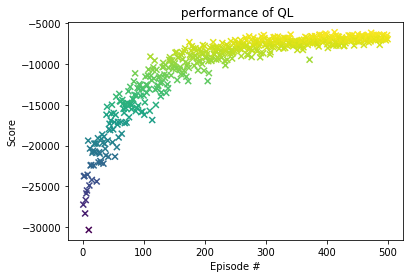

In [15]:
# Plot the policy performance
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance of QL')
plt.show()

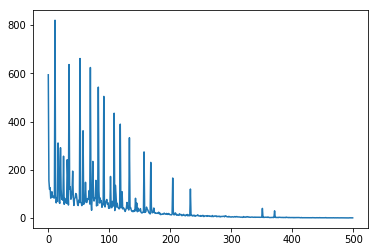

In [14]:
import matplotlib.pyplot as plt
plt.plot(deltas)
plt.show()

In [16]:
optimal_value =[]
current_state = 0 #it is new
degradation = 0
optimal_cost = []
expected_optimal_cost=[]

for j in range(2000+1):
     #Choose A from S
    action = np.argmax(Q_table[current_state])
    if action == 1:
        optimal_value.append(degradation)    
    # Take action
    current_state, reward ,degradation= Envirenment(degradation,action)
    optimal_cost.append(-reward)
    #print(optimal_cost)
    if any(np.array(optimal_cost) > 50):
        expected_optimal_cost.append(np.mean(optimal_cost))
    if action ==1:
          optimal_cost = []
    #print (reward ,degradation , action)

#print(optimal_value)
#print(".................")
#print(expected_optimal_cost)
#print(".................")
print("optimal degradation for repair=",np.mean(optimal_value))
print(".................")
print("cost for repair =",np.mean(expected_optimal_cost))

optimal degradation for repair= 7.446186630710226
.................
cost for repair = 69.65295919007502


In [20]:

optimal_value =[]
current_state = 0 #it is new
degradation = 0
optimal_cost = []
expected_optimal_cost=[]
num=[]
numm =[]

        
for j in range(2000+1):
    #Choose A from S
    action = np.argmax(Q_table[current_state])
    if action == 1:
        optimal_value.append(degradation) 
        num.append(j)
    
    numm =[3*num[i] - 3*num[i-1] for i in range(1, len(num))]
    #print(num , numm)
    # Take action
    current_state, reward ,degradation= Envirenment(degradation,action)
    optimal_cost.append(-reward)
    #print(optimal_cost)
    if any(np.array(optimal_cost) > 50):
        expected_optimal_cost.append(np.mean(optimal_cost))
    if action ==1:
        optimal_cost = []
    #print (reward ,degradation , action)
    
#print(optimal_value)
#print(".................")
#print(expected_optimal_cost)
#print(".................")
print("optimal degradation for repair=",np.mean(optimal_value))
#print(".................")
print("cost for repair =",np.mean(expected_optimal_cost))
print("Time for repair =",np.mean(numm))
#print("Time for repair =",numm)

optimal degradation for repair= 7.4453444505458934
cost for repair = 68.89503048089924
Time for repair = 22.330827067669173
